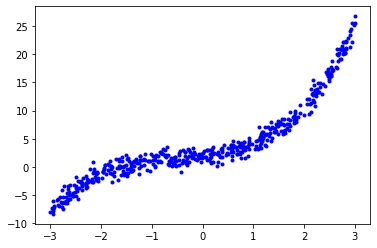

In [127]:
import numpy as np
import matplotlib.pyplot as plt

#Let's create a 3 grade data 

m = 500
X = 6 * np.random.rand(m, 1) - 3
y =  .5 * X**3 + 0.7 * X**2 + X + 2 + np.random.randn(m, 1)

plt.plot(X,y,"b.")

In [128]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

poly_features = PolynomialFeatures(degree=3,include_bias=False)

poly_features_2 =  PolynomialFeatures(degree=2,include_bias=False)


X_poly= poly_features.fit_transform(X)
linear_reg = LinearRegression()
linear_reg.fit(X_poly, y)


X_poly_2= poly_features_2.fit_transform(X)
linear_reg_2 = LinearRegression()
linear_reg_2.fit(X_poly_2, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

(-3.0, 3.0, -15.0, 25.0)

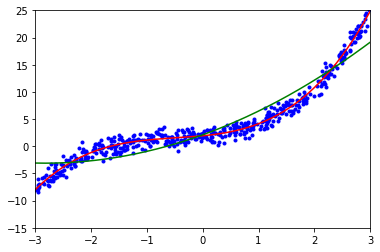

In [129]:

X_new = np.linspace(-3,3,500).reshape(500,1)
X_new_poly = poly_features.fit_transform(X_new)
predictions = linear_reg.predict(X_new_poly)

X_new_poly_2 = poly_features_2.fit_transform(X_new)
predictions_2 = linear_reg_2.predict(X_new_poly_2)

plt.plot(X,y,"b.")
plt.plot(X_new, predictions, "r-")
plt.plot(X_new, predictions_100, "g-") #OVERFITTING 
plt.axis([-3,3,-15,25])

In [130]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
  X_train, X_val, y_train, y_val = train_test_split(X,y, test_size = 0.2)
  train_errors, val_errors = [],[]

  for m in range(1, len(X_train)):
    model.fit(X_train[:m],  y_train[:m])
    y_train_predict = model.predict(X_train[:m])
    y_val_predict = model.predict(X_val)
    
    train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
    val_errors.append(mean_squared_error(y_val, y_val_predict))

  plt.plot(np.sqrt(train_errors), "r+", label="train")
  plt.plot(np.sqrt(val_errors), "b-", label="val")
  plt.legend(loc="upper right", fontsize=14)   # not shown in the book
  plt.xlabel("Training set size", fontsize=14) # not shown
  plt.ylabel("RMSE", fontsize=14)              # not shown
  plt.axis([0,400,0,3])

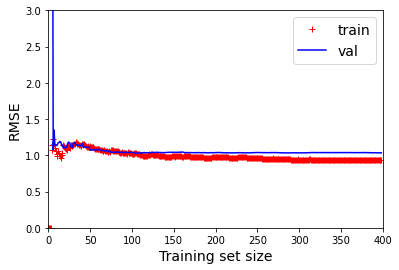

In [135]:
plot_learning_curves(linear_reg, X_poly, y)

#plot_learning_curves(linear_reg_2, X_poly_2, y)